In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

from PIL import Image

from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

Using TensorFlow backend.


In [2]:
train = pd.read_csv('datasets/sign_mnist_train.csv')
test = pd.read_csv('datasets/sign_mnist_test.csv')

In [3]:
labels = train['label'].values
train.drop('label', axis = 1, inplace = True)

images = train.values
images = np.array([np.reshape(i, (28, 28)) for i in images])
images = np.array([i.flatten() for i in images])

label_binrizer = LabelBinarizer()
labels = label_binrizer.fit_transform(labels)

In [4]:
batch_size = 128
num_classes = 24
epochs = 20

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.3, random_state = 101)

x_train = x_train / 255
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

x_test = x_test / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [5]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(rate = 0.80))
model.add(Dense(num_classes, activation = 'softmax'))

model.compile(loss = keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=epochs, batch_size=batch_size)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 19218 samples, validate on 8237 samples
Epoch 1/20
19218/19218 [==============================] - 37s 2ms/step - loss: 3.0632 - acc: 0.0786 - val_loss: 2.5959 - val_acc: 0.1947
Epoch 2/20
19218/19218 [==============================] - 38s 2ms/step - loss: 2.3000 - acc: 0.2664 - val_loss: 1.4499 - val_acc: 0.6002
Epoch 3/20
19218/19218 [==============================] - 40s 2ms/step - loss: 1.6096 - acc: 0.4608 - val_loss: 0.9304 - val_acc: 0.7579
Epoch 4/20
19218/19218 [==============================] - 43s 2ms/step - loss: 1.2146 - acc: 0.5820 - val_loss: 0.6442 - val_acc: 0.8045
Epoch 5/20
19218/19218 [==============================] - 42s 2ms/step - loss: 1.0035 - acc: 0.6525 - val_loss: 0.4992 - val_acc: 0.8695
Epoch 6/20
19218/19218 [=======

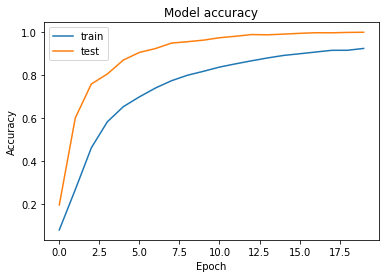

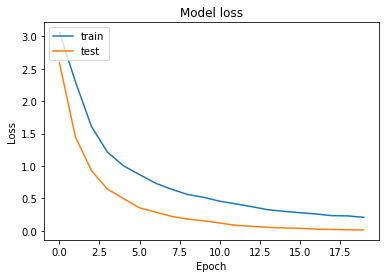

In [6]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
test_labels = test['label']
test.drop('label', axis = 1, inplace = True)

test_images = test.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

label_binrizer = LabelBinarizer()
test_labels = label_binrizer.fit_transform(test_labels)

In [8]:
y_pred = model.predict(test_images)
accuracy_score(test_labels, y_pred.round())

0.8551310652537646

In [11]:
def predict_from_frame(frame):
    
    #Resizing into 28x28 because we trained the model with this image size.
    im = cv2.resize(frame, (28,28))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    
    plt.imshow(im.reshape(28,28))
    
    im = im.reshape((1,28,28,1))
    im = np.array(im)
    
    
    
    #Calling the predict method on model
    prediction = model.predict(im)
    prediction = np.argmax(prediction)
    prediction = chr(int(prediction) + 65)
    
    cv2.putText(frame, prediction, (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, 255)
    
    return

def draw_rectangle(frame):
    
        # Dessine un rectange
        height, width, channels = frame.shape
        x = int(width/4)
        w = x * 3
        y = int(height/4)
        h = y * 3
        cv2.rectangle(frame, (x, y), (w, h), (0, 255, 0), 2)
        
        # On cropp la frame pour éliminer le bruit
        im = frame[y:h, x:w]
        
        return (im)

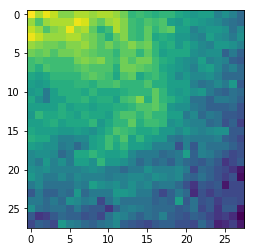

In [12]:
#Load the saved model
video = cv2.VideoCapture(0)

while True:
        _, frame = video.read()
        
        # Dessine un rectangle et cropp l'image
        im = draw_rectangle(frame)
        
        # Entre l'image dans le model et prédit
        predict_from_frame(im)   
        
        # Display l'image
        cv2.imshow("Capturing", frame)
                
        key=cv2.waitKey(1)
        if key == ord('q'):
                break
video.release()
cv2.destroyAllWindows()